In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
%pwd

'/content'

## Install YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 758.7 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/107.7 GB disk)


## Install ByteTrack

In [ ]:
import os
HOME = os.getcwd()

In [ ]:
%pwd

'/content'

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append("/content/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

## Install Roboflow Supervision

In [ ]:
!pip install supervision==0.1.0

In [ ]:
from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


## Load pre-trained YOLOv8 model

In [ ]:
# settings
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 271MB/s]


YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [ ]:
%cd /content

/content


In [ ]:
%pwd

In [ ]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source={"/content/2103099-uhd_3840_2160_30fps.mp4"}

100% 131M/131M [00:00<00:00, 290MB/s]
Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5c0218c2e8c0] moov atom not found
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 834, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 563, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils

In [ ]:
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.draw.color import ColorPalette

In [ ]:
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

## Predict and annotate single frame

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [2, 3, 5, 7]


0: 384x640 1 person, 17 cars, 1 bus, 6 trucks, 62.4ms
Speed: 4.0ms preprocess, 62.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


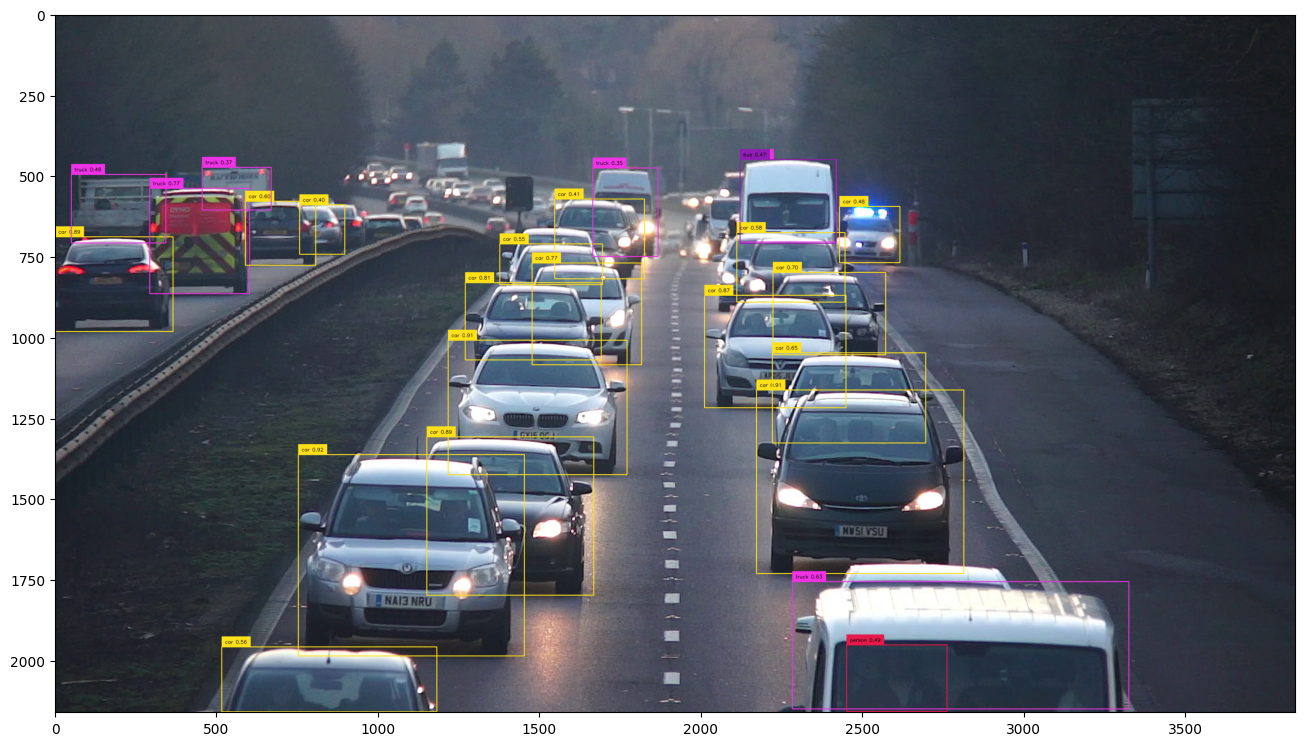

In [ ]:
# create frame generator
generator = get_video_frames_generator("/content/drive/MyDrive/Green Light/2103099-uhd_3840_2160_30fps.mp4")
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)

# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: supervision
    Found existing installation: supervision 0.1.0
    Uninstalling supervision-0.1.0:
      Successfully uninstalled supervision-0.1.0


In [ ]:
import pandas as pd

#Count the occurrences of each class ID
class_counts = detections.class_id.tolist()
class_counts = {CLASS_NAMES_DICT[i]: class_counts.count(i) for i in set(class_counts)}

#Create a Pandas DataFrame from the class counts
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count1'])
print(df)

        Count1
person       1
car         17
bus          1
truck        6


In [ ]:
road1_count = df['Count1'].sum()
print(road1_count)

25



0: 640x384 3 persons, 17 cars, 2 motorcycles, 2 buss, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


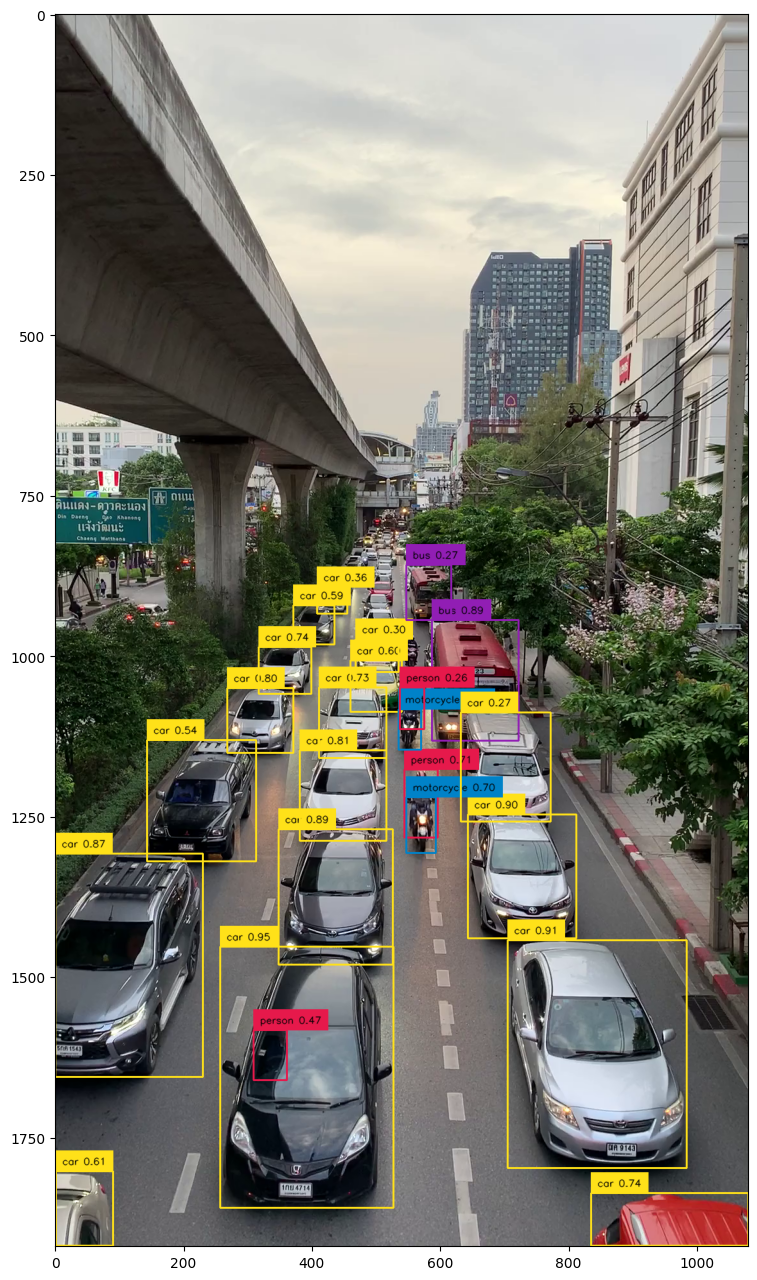

In [ ]:
# create frame generator
generator = get_video_frames_generator("/content/drive/MyDrive/Green Light/WhatsApp Video 2024-08-02 at 23.21.12.mp4")
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:

#Count the occurrences of each class ID
class_counts = detections.class_id.tolist()
class_counts = {CLASS_NAMES_DICT[i]: class_counts.count(i) for i in set(class_counts)}

#Create a Pandas DataFrame from the class counts
df['Count2'] = class_counts
print(df)

        Count1  Count2
person       1     3.0
car         17    17.0
bus          1     2.0
truck        6     NaN


In [ ]:
road2_count = df['Count2'].sum()
print(road2_count)

24



0: 384x640 1 person, 16 cars, 64.8ms
Speed: 3.0ms preprocess, 64.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


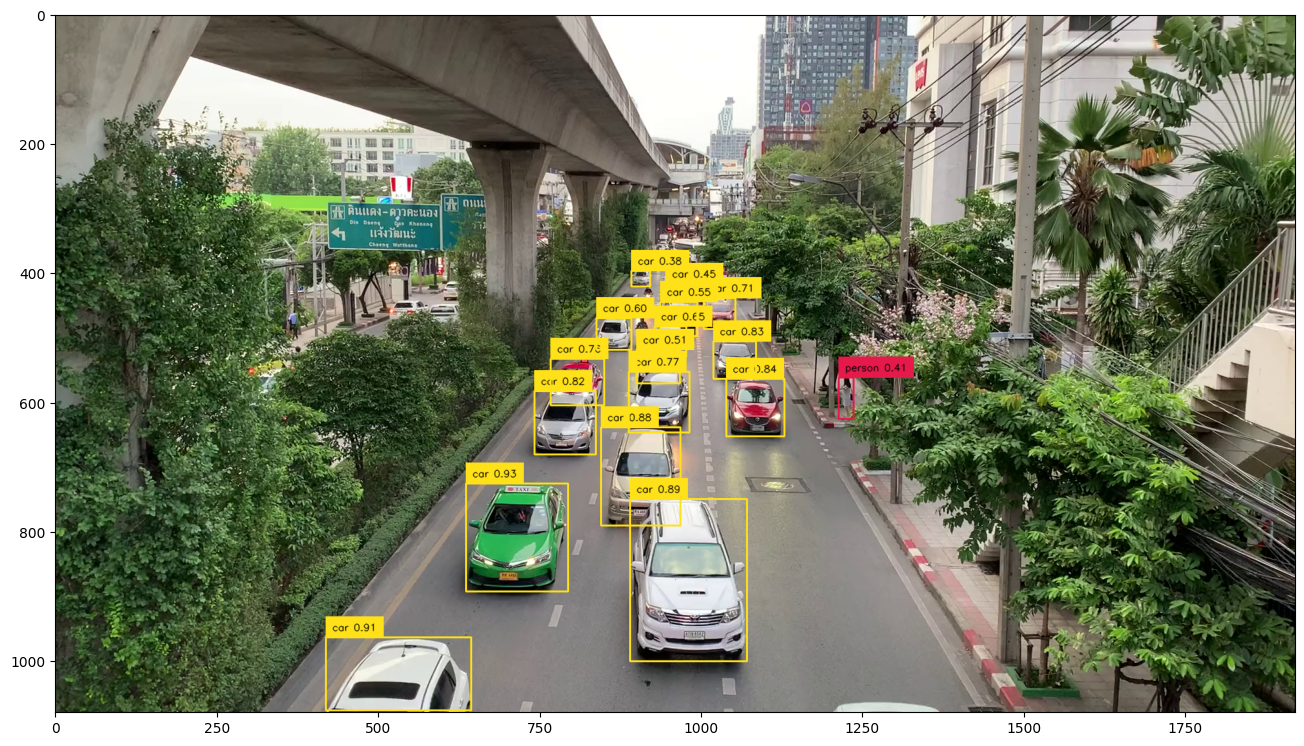

In [ ]:
# create frame generator
generator = get_video_frames_generator("/content/drive/MyDrive/Green Light/WhatsApp Video 2024-08-02 at 23.23.36.mp4")
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:

#Count the occurrences of each class ID
class_counts = detections.class_id.tolist()
class_counts = {CLASS_NAMES_DICT[i]: class_counts.count(i) for i in set(class_counts)}

#Create a Pandas DataFrame from the class counts
df['Count3'] = class_counts
print(df)

        Count1  Count2  Count3
person       1     3.0     1.0
car         17    17.0    16.0
bus          1     2.0     NaN
truck        6     NaN     NaN


In [ ]:
road3_count = df['Count3'].sum()
print(road1_count)
print(road2_count)
print(road3_count)

25
24
17.0


In [ ]:
# Initialize variables
vehicle_counts = {'road1': road1_count, 'road2': road2_count, 'road3': road3_count}
rounds_stayed_red = {'road1': 0, 'road2': 0, 'road3': 0}
max_rounds_red = 2

def decide_signal():
    # Find the lane with maximum vehicles
    max_lane = max(vehicle_counts, key=vehicle_counts.get)

    # Check if any lane has stayed red for too long
    for lane, rounds in rounds_stayed_red.items():
        if rounds >= max_rounds_red:
            max_lane = lane
            break

    # Update rounds_stayed_red and signals
    for lane in vehicle_counts.keys():
        if lane == max_lane:
            rounds_stayed_red[lane] = 0
            print(f"{lane} signal turned green.")
        else:
            rounds_stayed_red[lane] += 1
            print(f"{lane} signal turned red.")

def traffic_signal_control():
    while True:
        decide_signal()
        # Wait for a specified duration before next update
        # time.sleep(5000)  # Uncomment and set duration as needed

# Example usage
if __name__ == "__main__":
    # try:
    #     while True:
    #         traffic_signal_control()
    # except KeyboardInterrupt:
    #     print("Traffic control stopped.")
    # traffic_signal_control()
    decide_signal()

NameError: name 'road1_count' is not defined